In [1]:
# Add DEVENV_PATH to the path so that we can import the modules
import sys
from os import getenv

import pendulum
sys.path.append(getenv("DEVENV_ROOT"))

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns
import greenflow.analysis as an
from entrypoint import load_gin
from greenflow.utils import convert_to_mib

cutoff_begin = "2024-12-16T03:15:35.626996+01:00"
cutoff_end = "2025-01-01T03:15:35.626996+01:00"
cutoff_end = pendulum.now().to_iso8601_string()

load_gin(exp_name="ingest-kafka", test=False)


[WARNING]: failed to patch stdout/stderr for fork-safety: 'OutStream' object
has no attribute 'buffer'
[WARNING]: failed to reconfigure stdout/stderr with the replace error handler:
'OutStream' object has no attribute 'reconfigure'


In [2]:
def plot_throughput_vs_memory(enriched_data: pd.DataFrame):
    # Restack this to show memory impact 
    redpanda_df = enriched_data[enriched_data["exp_name"] == "ingest-redpanda"]
    kafka_df = enriched_data[enriched_data["exp_name"] == "ingest-kafka"]

    # Add a new column for memory in MiB
    redpanda_df['broker_mem_mib'] = redpanda_df['broker_mem'].apply(convert_to_mib)
    min_throughput = min(redpanda_df['throughput_MBps'].min(), kafka_df['throughput_MBps'].min())
    min_throughput = 0
    max_throughput = max(redpanda_df['throughput_MBps'].max(), kafka_df['throughput_MBps'].max())

    kafka_df['broker_mem_mib'] = kafka_df['broker_mem'].apply(convert_to_mib)
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(data=redpanda_df, x='broker_cpu', y='throughput_MBps', hue='broker_mem_mib')
    # sns.pointplot(data=redpanda_df, x='broker_mem_mib', y='throughput_MBps', hue='broker_cpu')

    plt.title('Redpanda')
    plt.xlabel('Cores')
    plt.ylabel('Throughput (MBps)')
    plt.legend(title='Memory')
    plt.ylim((min_throughput - 0.05 * min_throughput, max_throughput + 0.05 * max_throughput))
    plt.grid(True)

    plt.subplot(1, 2, 2)
    # sns.scatterplot(data=kafka_df, x='broker_mem_mib', y='throughput_MBps', hue='broker_cpu', palette='viridis', alpha=0.7)
    sns.barplot(data=kafka_df, x='broker_cpu', y='throughput_MBps', hue='broker_mem_mib')
    plt.title('Kafka')
    plt.xlabel('Cores')
    plt.ylabel('Throughput (MBps)')
    plt.legend(title='Memory')
    plt.ylim((min_throughput - 0.05 * min_throughput, max_throughput + 0.05 * max_throughput))
    plt.grid(True)
    plt.show()


In [3]:
# ovhnvme_1 = an.full_analytical_pipeline(
#     cutoff_begin=cutoff_begin,
#     cutoff_end=cutoff_end,
#     cluster="ovhnvme",
#     type="memImpact",
#     partitions=1,
# )
# ovhnvme_100 = an.full_analytical_pipeline(
#     cutoff_begin=cutoff_begin,
#     cutoff_end=cutoff_end,
#     cluster="ovhnvme",
#     type="memImpact",
#     partitions=100,
# )
grappe_1 = an.full_analytical_pipeline(
    cutoff_begin=cutoff_begin,
    cutoff_end=cutoff_end,
    cluster="grappe",
    type="memImpact",
    partitions=1,
)
grappe_100 = an.full_analytical_pipeline(
    cutoff_begin=cutoff_begin,
    cutoff_end=cutoff_end,
    cluster="grappe",
    type="memImpact",
    partitions=120,
)
taurus_1 = an.full_analytical_pipeline(
    cutoff_begin=cutoff_begin,
    cutoff_end=cutoff_end,
    cluster="taurus",
    type="memImpact",
    partitions=1,
)
taurus_120 = an.full_analytical_pipeline(
    cutoff_begin=cutoff_begin,
    cutoff_end=cutoff_end,
    cluster="taurus",
    type="memImpact",
    partitions=120,
)

In [4]:
# plot_throughput_vs_memory(ovhnvme_1)
# plot_throughput_vs_memory(ovhnvme_100)

In [5]:
# plot_throughput_vs_memory(grappe_1)
# plot_throughput_vs_memory(grappe_100)

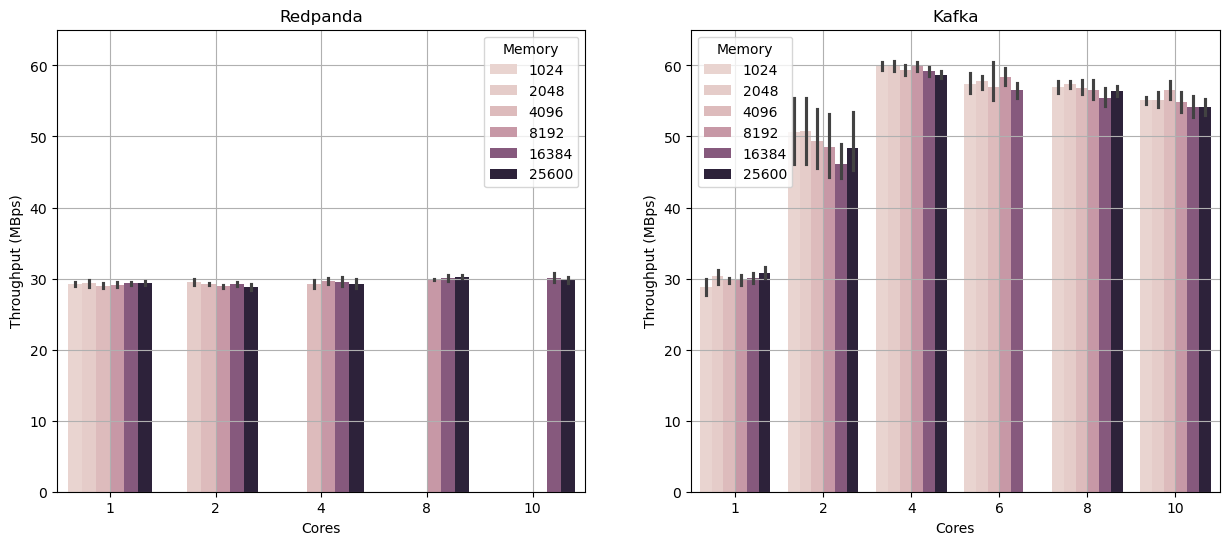

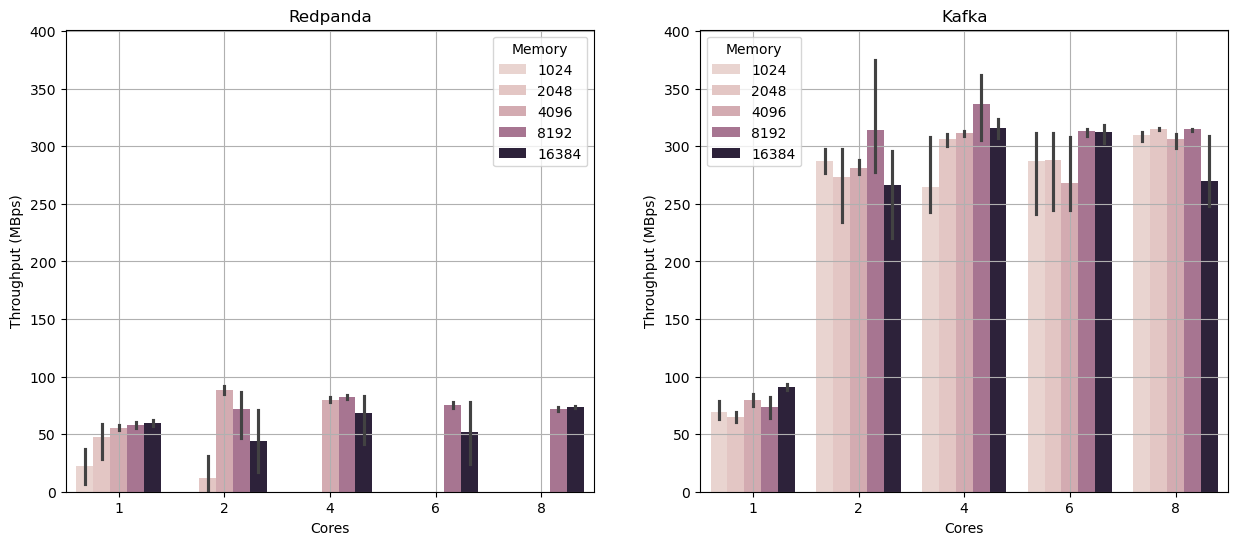

In [6]:
plot_throughput_vs_memory(taurus_1)
# an.create_qgrid_widget(taurus_100)
plot_throughput_vs_memory(taurus_120)